In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['figure.figsize'] = (10.0, 4.0)

In [2]:
# read in from labMT data and save to df
df = pd.read_csv("LabMT 1.0.csv", usecols=[0,1,2], names=['word','rank','score'], index_col=1)
df.index = df.index - 1
df.head()

,word,score
rank,,
0,laughter,8.50
1,happiness,8.44
2,love,8.42
3,happy,8.30
4,laughed,8.26


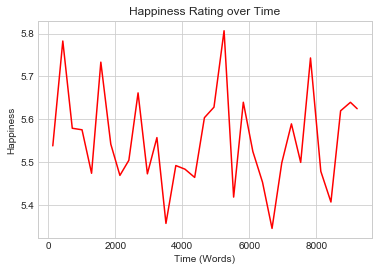

In [3]:
# read in text
infile = open("input.txt", "r")
text = infile.read()

#split by                       words, single or double contractions
words = pd.DataFrame(re.findall(r'\w+\'re|\w+\'.|\w+', text))

words.columns = ["word"]
words["word"] = words["word"].str.lower() #convert to lowercase
words["place"] = words.index

#words.head()

#figure out words in df
output = pd.merge(words, df, on=["word"], how="inner")
output.sort_values(by=['place'], inplace=True)
#print(output)

#remove neutral words not really being considered 
nullwords = ["and", "the", "there", "he", "she", "it", "was", "a", "an", "their", "they're", "for", "to", "from", "too",
             "I", "me", "how", "them", "so", "this", "that", "we", "since", "is", "of", "be", "it's", "are", "", 
             "", "", "", "", "", "", "", "", "", ""]

output = output[~output["word"].isin(nullwords)] #remove neutral words
#print(output)

#average every group of n scores of words
n = 200
output = output.groupby(np.arange(len(output))//n).mean()
#print(output)

#print timeline
axes = plt.subplot()
axes.plot(output["place"], output["score"], color="r")
axes.set_title("Happiness Rating over Time")
axes.set_ylabel("Happiness")
axes.set_xlabel("Time (Words)")

print()